In the near term, I'm focused on simply characterizing what's in OBIS that may be useful for ultimately developing subvariables, data derivatives, and other reporting capabilities for the EOVs. This may help identify where there are major gaps in data that could be flowing into OBIS but that may not be at the moment for some reason. Identifying those gaps of known data will help us work on ways to bring those data online in the network.

In [1]:
from IPython.display import display
import pegasus_functions as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
eov_packet = pf.get_eov_packet()

In [7]:
for eov,packet in eov_packet.items():
    print(f'{packet["label"]} - Summary Stats')

    summary_stats = pf.summary_stats_by_aphiaids(pf.get_eov_packet(eov_name=eov, taxon_ids_only=True), summary_type="statistics")
    
    display(summary_stats)


Hard coral cover and composition - Summary Stats


{'datasets': 535,
 'records': 1689058,
 'species': 16390,
 'specieslevel': 1030509,
 'taxa': 18265,
 'yearrange': [1691, 2018]}

Fish abundance and distribution - Summary Stats


{'datasets': 867,
 'records': 22110414,
 'species': 15085,
 'specieslevel': 20603437,
 'taxa': 18463,
 'yearrange': [1643, 2018]}

Invertebrate abundance and distribution - Summary Stats


None

Macroalgal canopy cover and composition - Summary Stats


{'datasets': 375,
 'records': 1101559,
 'species': 4181,
 'specieslevel': 831871,
 'taxa': 5284,
 'yearrange': [1648, 2018]}

Mangrove cover and composition - Summary Stats


{'datasets': 32,
 'records': 3811,
 'species': 46,
 'specieslevel': 3605,
 'taxa': 57,
 'yearrange': [1794, 2018]}

Microbe biomass and diversity - Summary Stats


{'datasets': 301,
 'records': 989024,
 'species': 1151,
 'specieslevel': 169187,
 'taxa': 2431,
 'yearrange': [1776, 2018]}

Phytoplankton biomass and diversity - Summary Stats


{'datasets': 447,
 'records': 5186235,
 'species': 7147,
 'specieslevel': 3767941,
 'taxa': 8612,
 'yearrange': [1596, 2018]}

Seagrass cover and composition - Summary Stats


{'datasets': 95,
 'records': 75722,
 'species': 54,
 'specieslevel': 68872,
 'taxa': 67,
 'yearrange': [1897, 2018]}

Marine turtles, birds, mammals abundance and distribution - Summary Stats


{'datasets': 782,
 'records': 5593191,
 'species': 648,
 'specieslevel': 5008002,
 'taxa': 928,
 'yearrange': [1520, 2019]}

Zooplankton biomass and diversity - Summary Stats


{'datasets': 1040,
 'records': 4253673,
 'species': 13496,
 'specieslevel': 2926672,
 'taxa': 15963,
 'yearrange': [1758, 2018]}

'DataFrame' object has no attribute 'year'


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


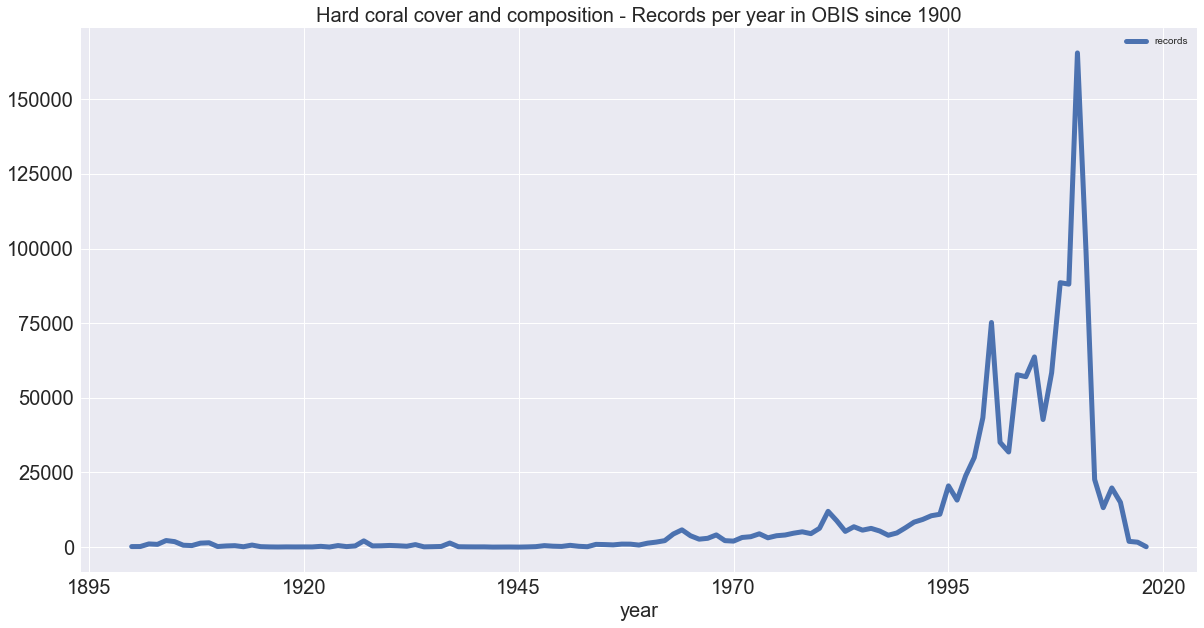

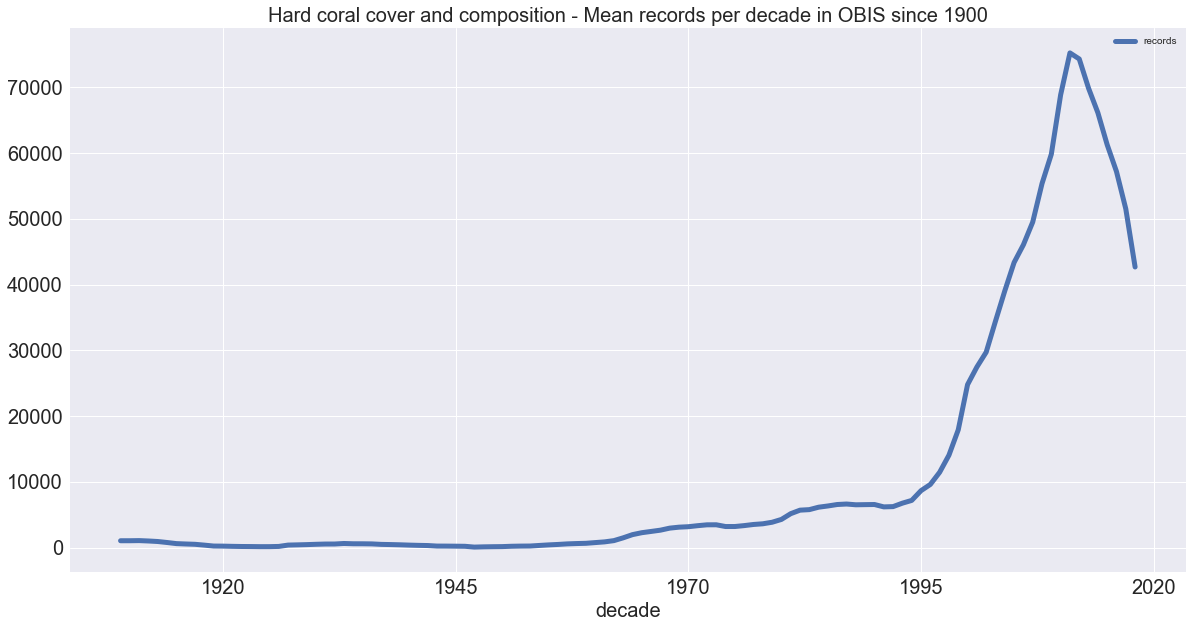

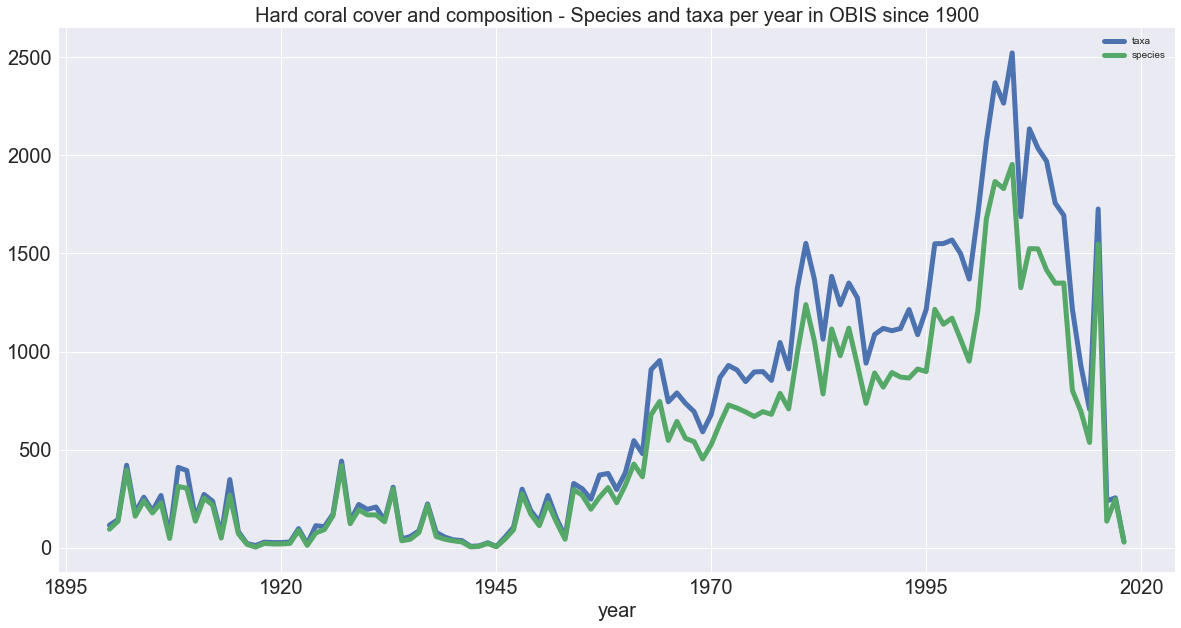

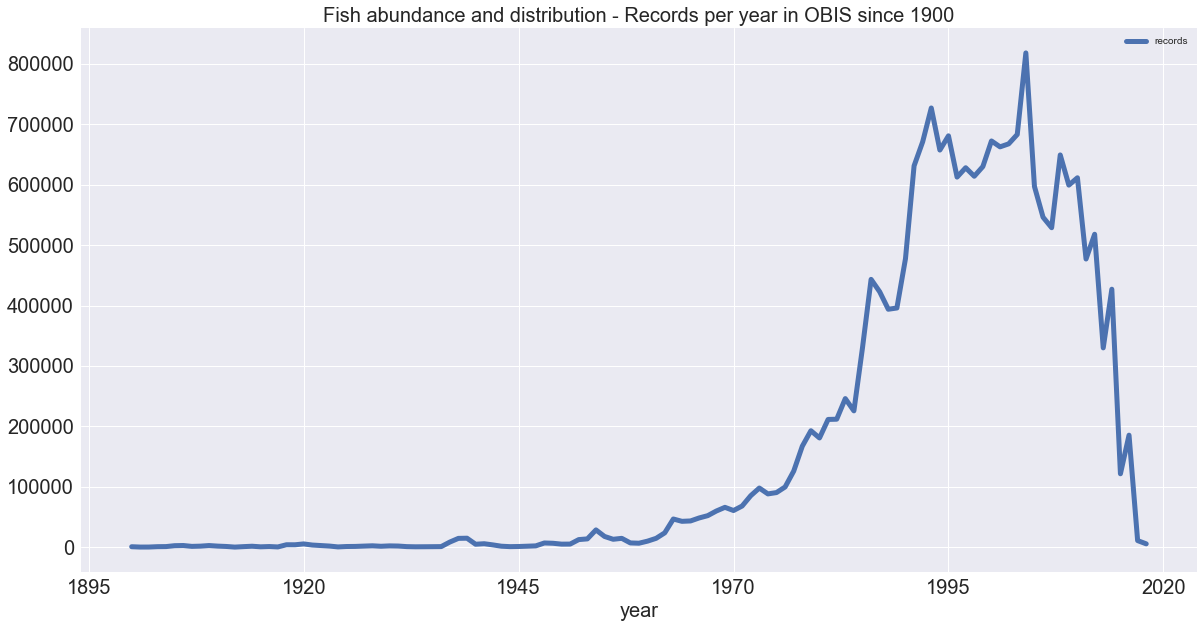

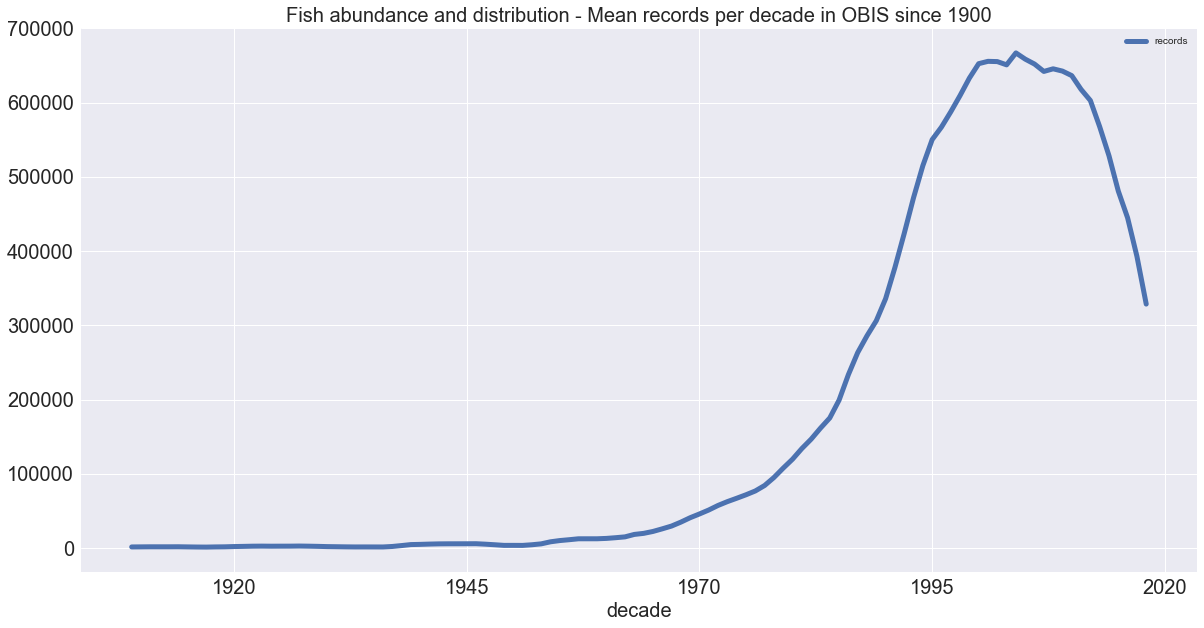

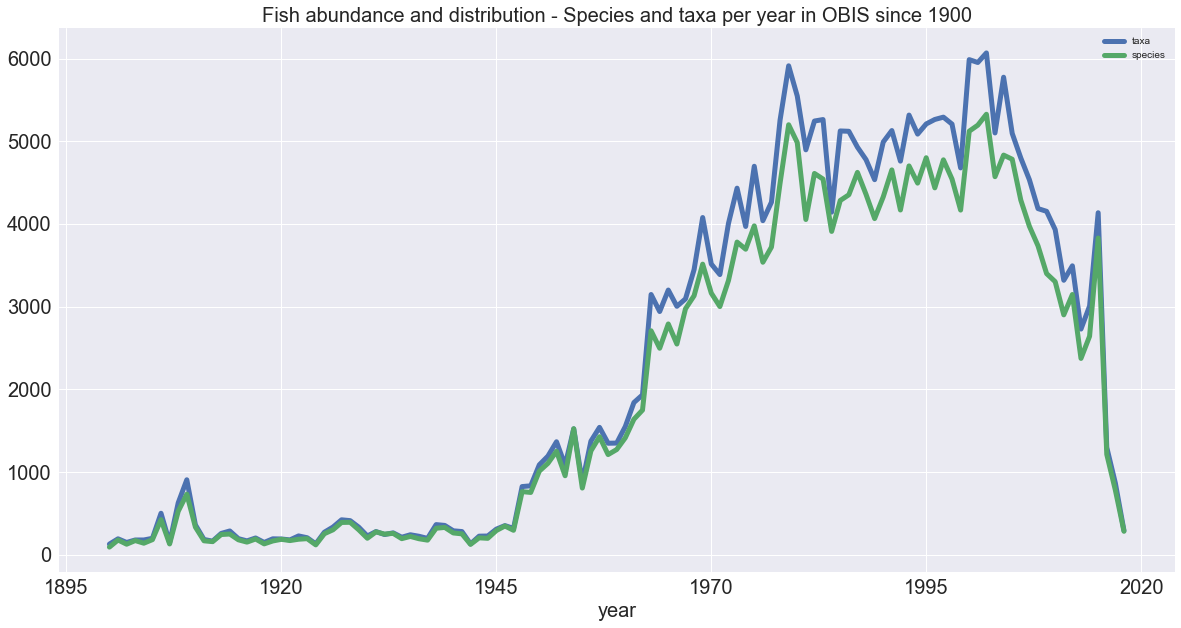

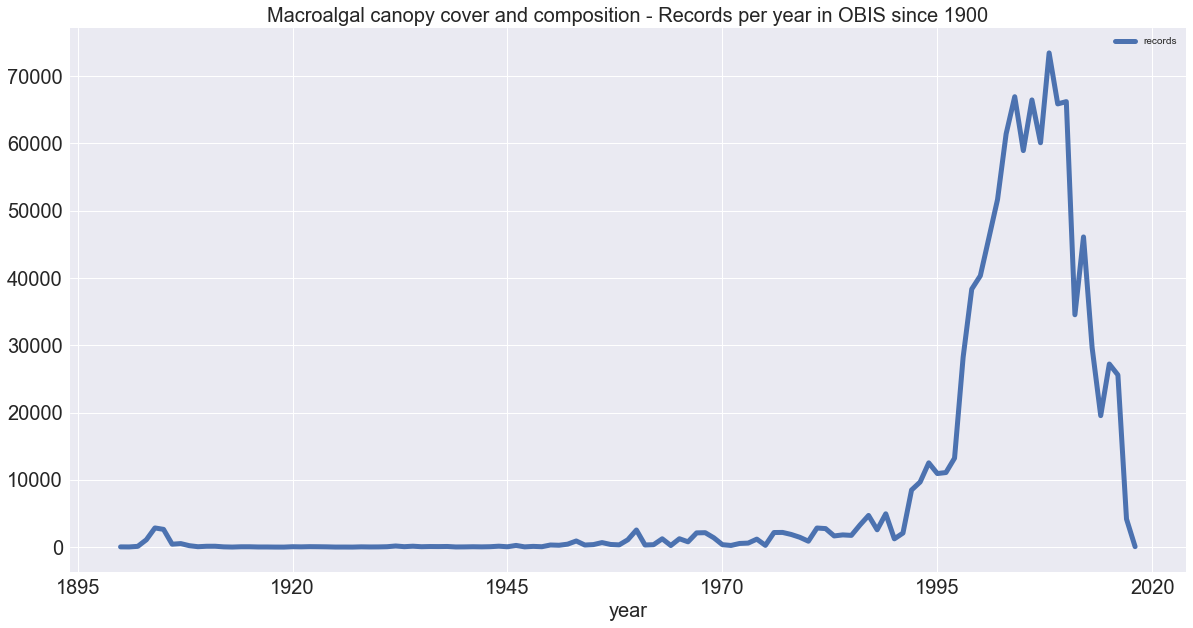

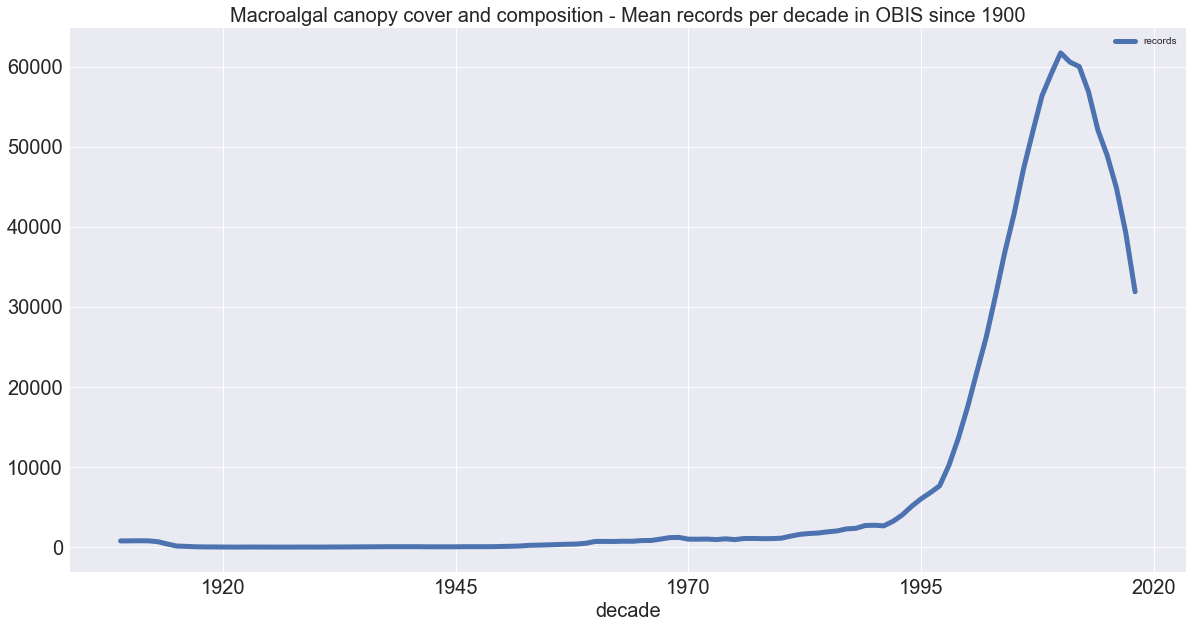

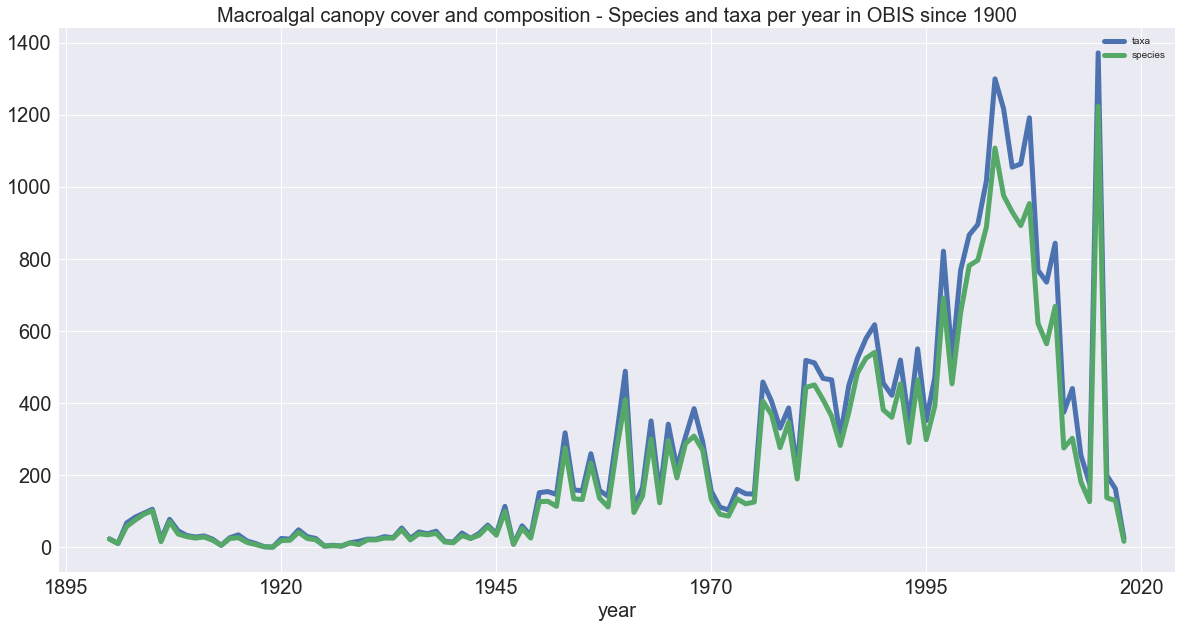

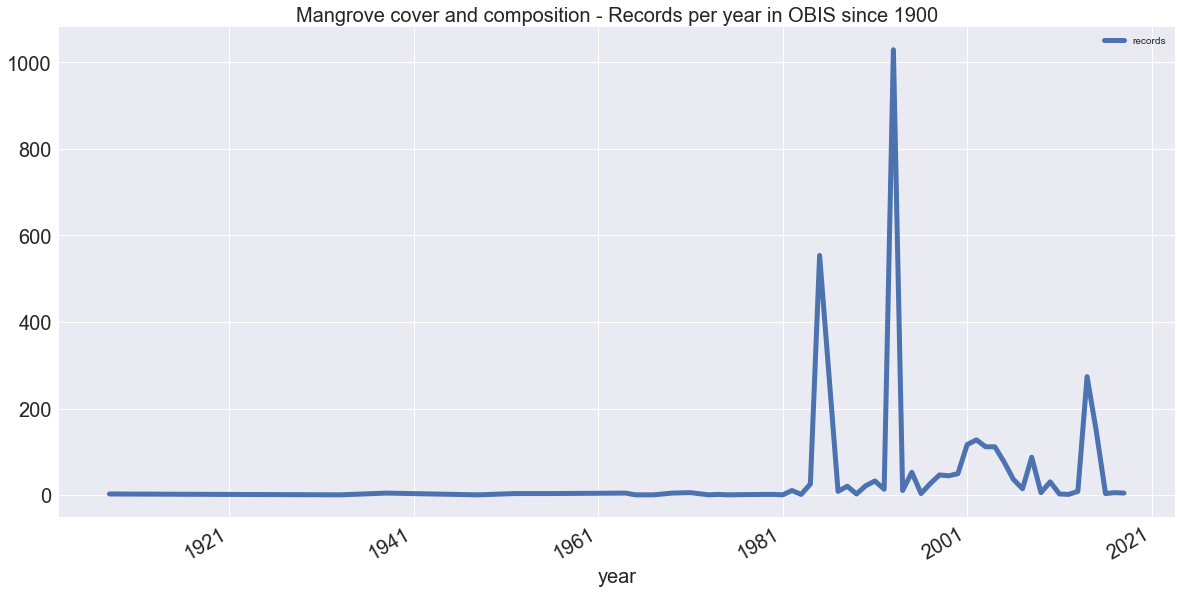

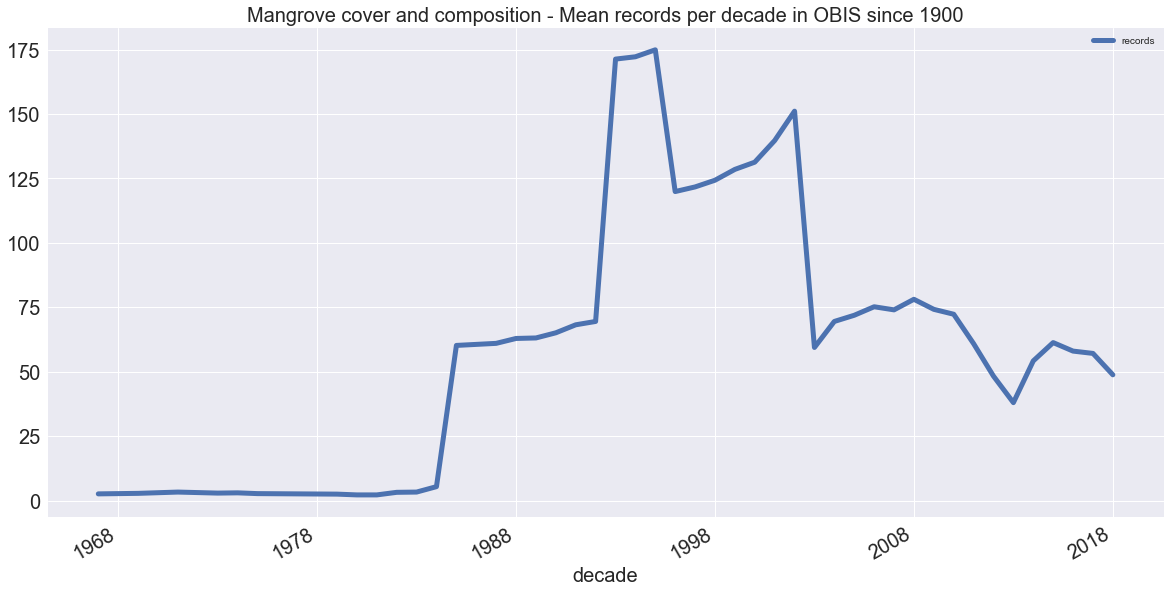

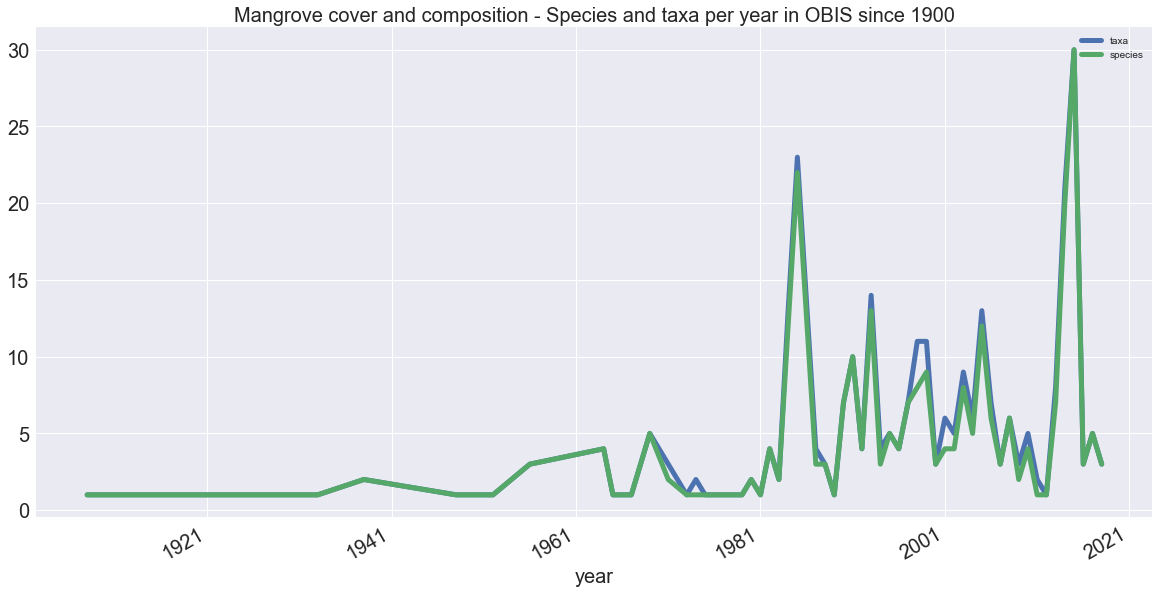

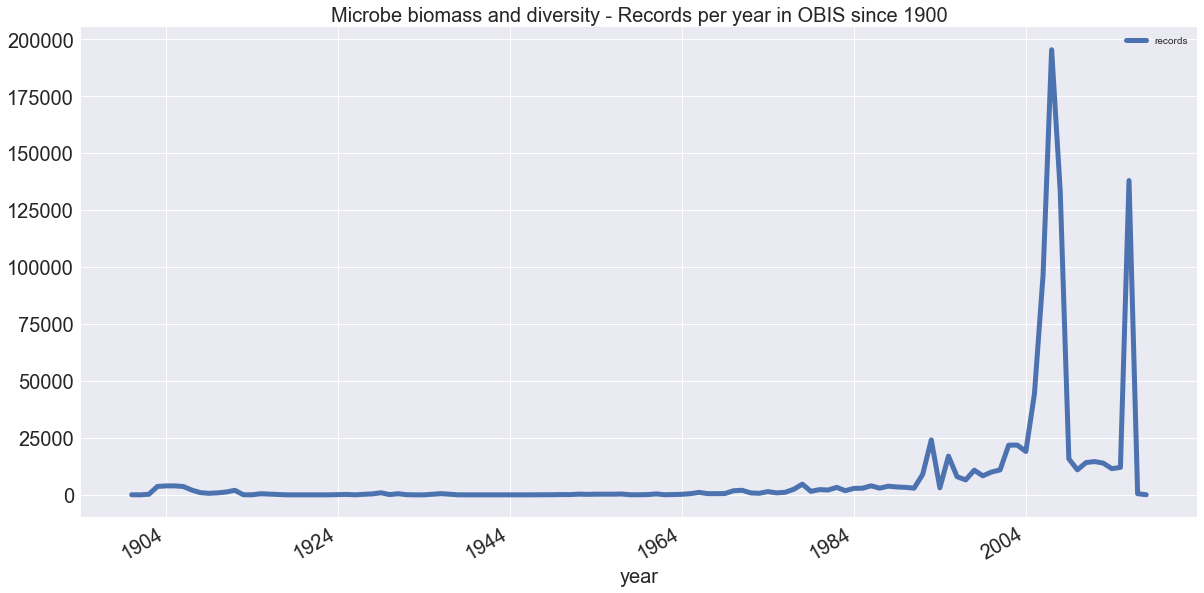

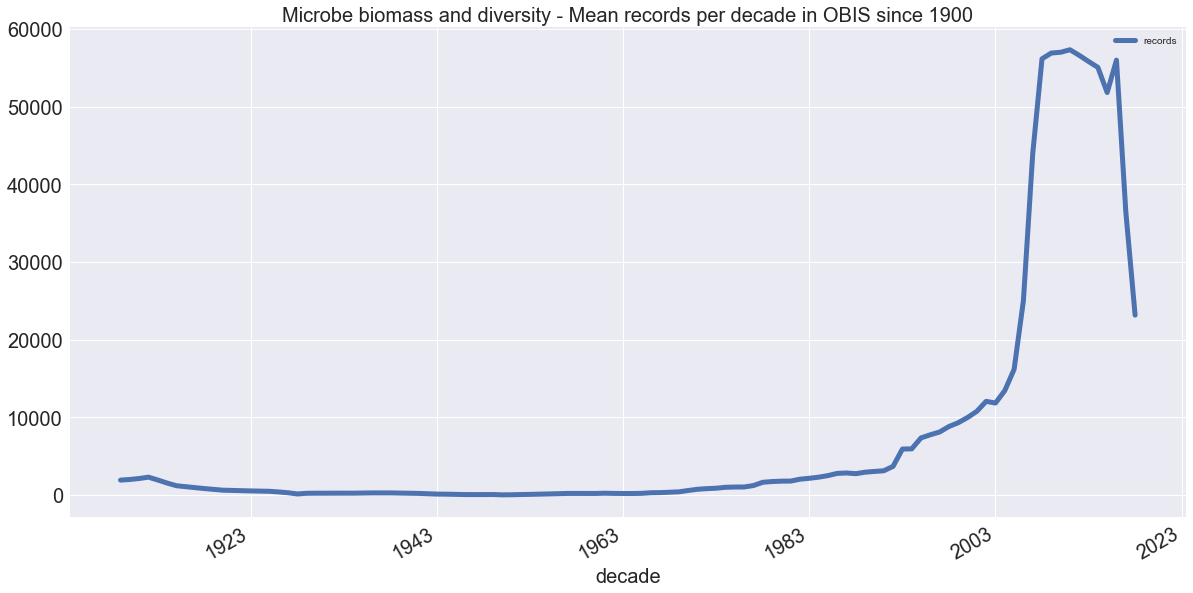

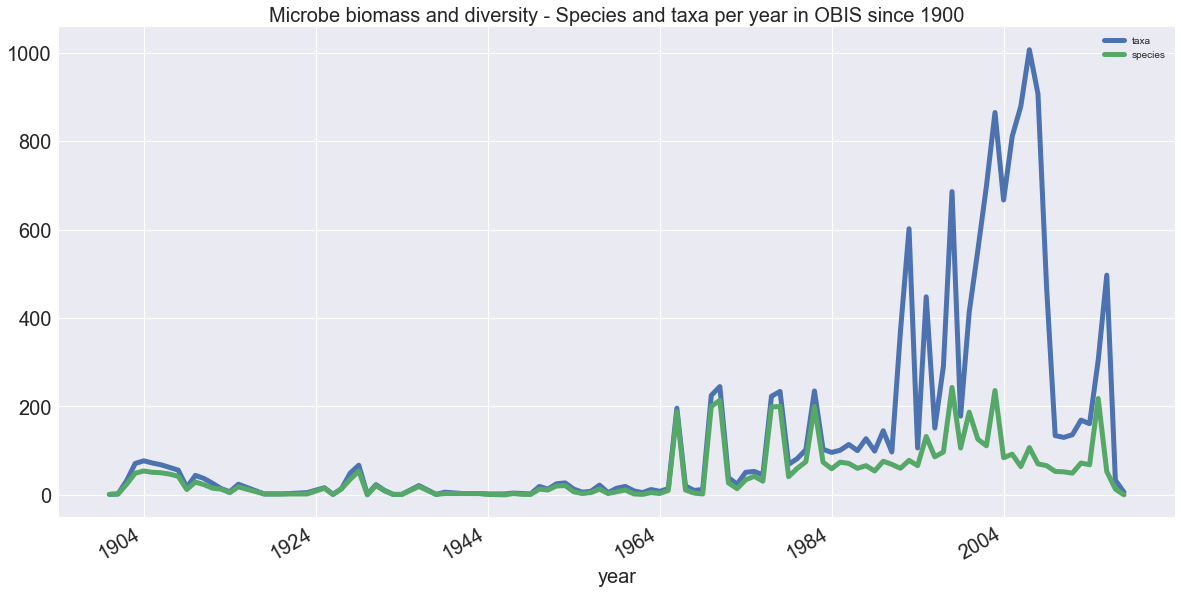

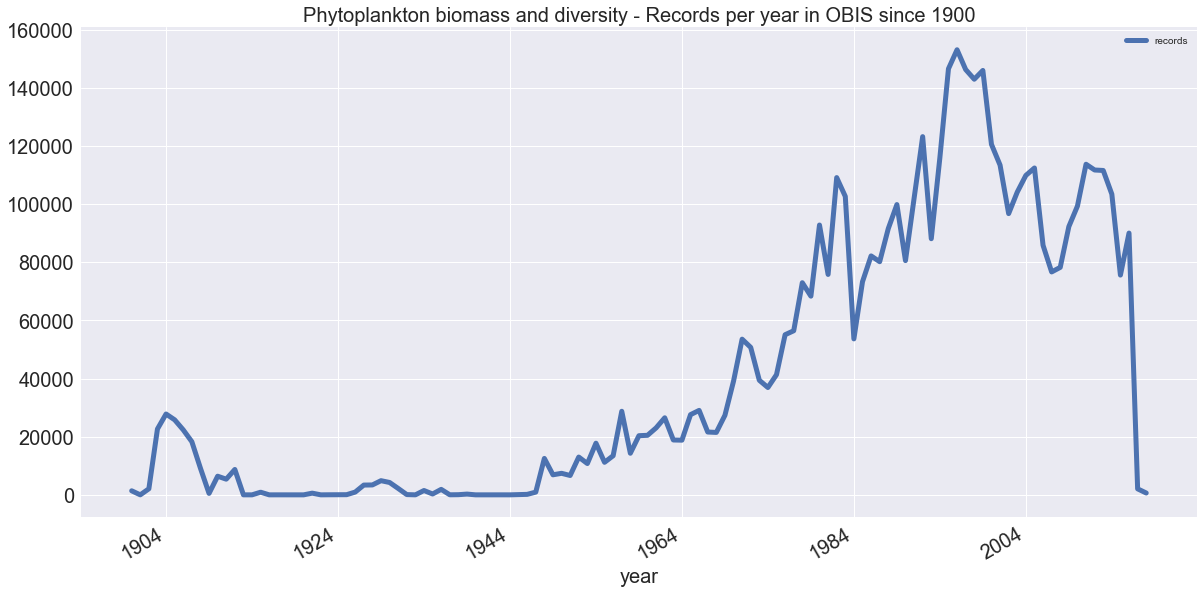

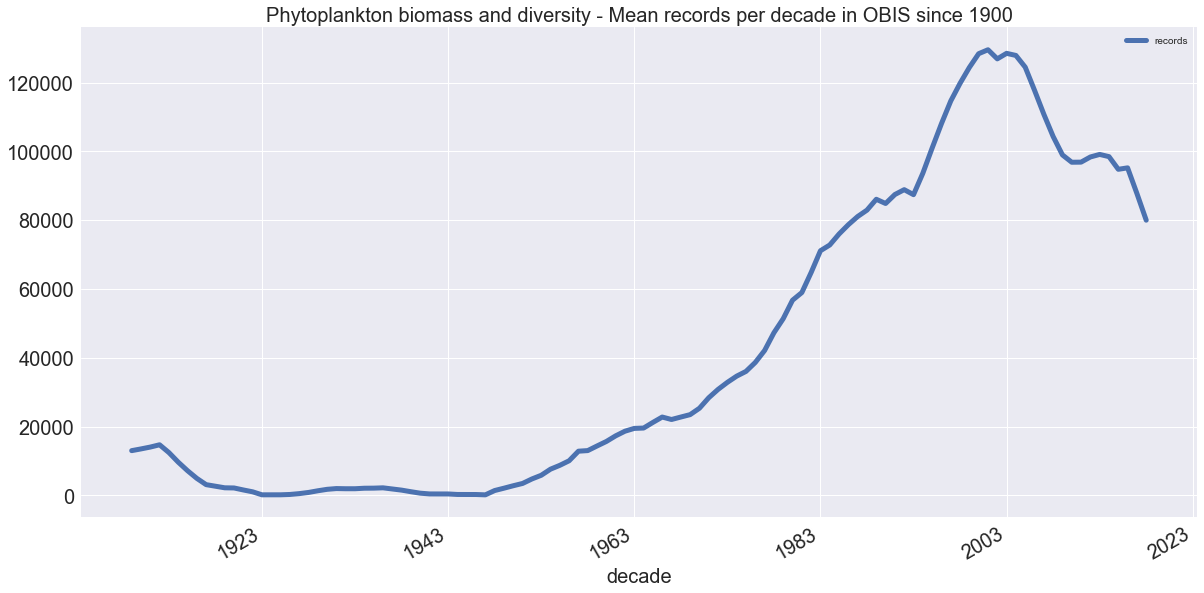

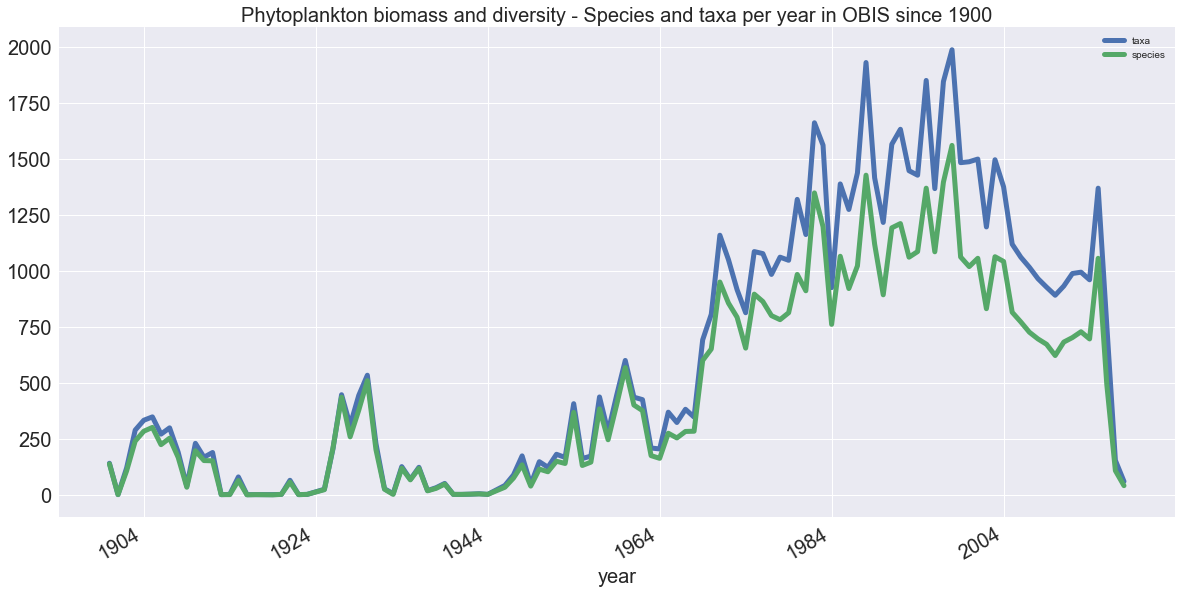

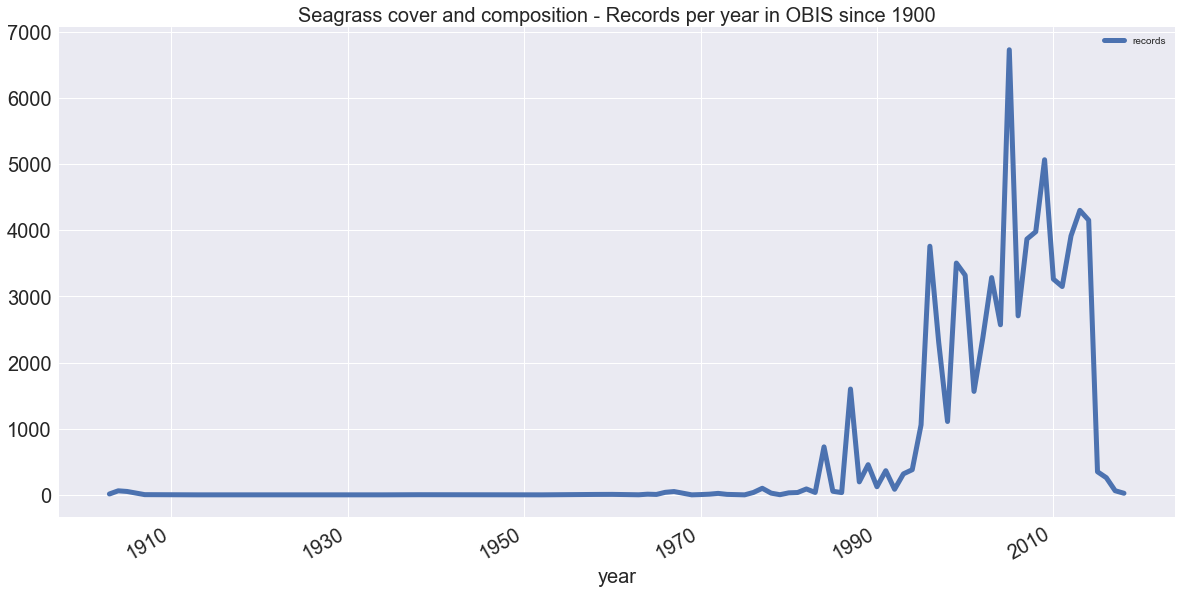

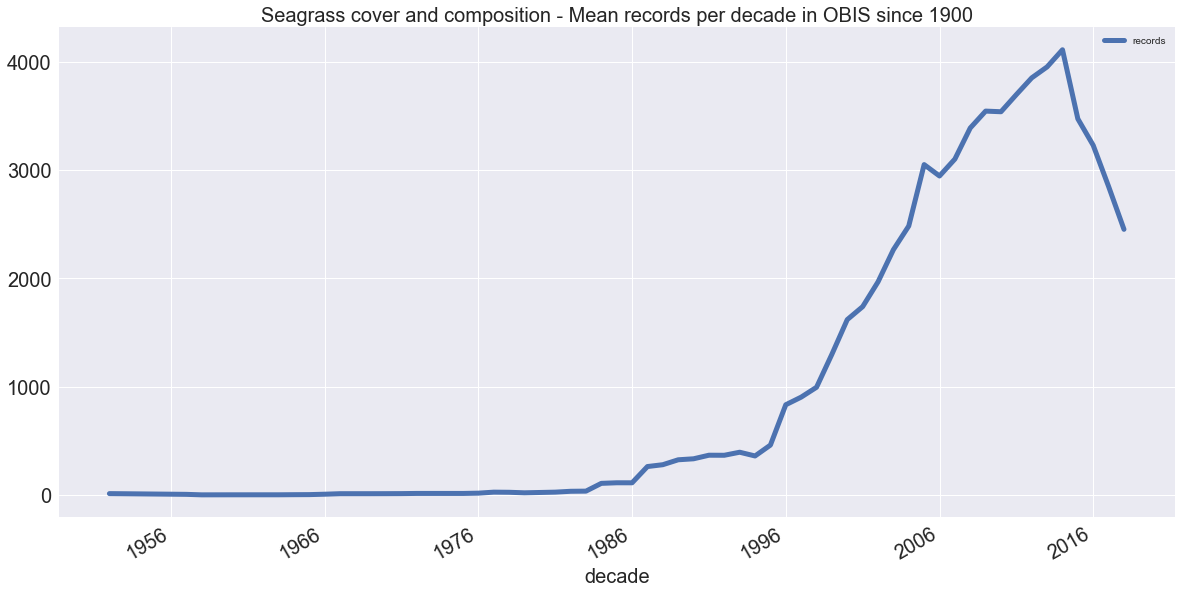

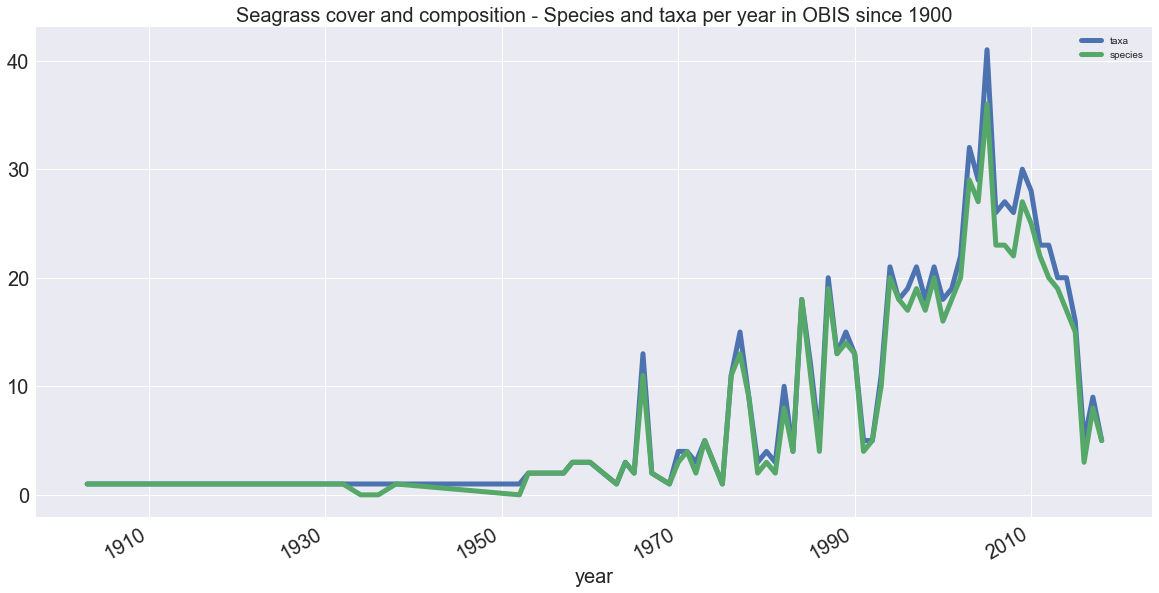

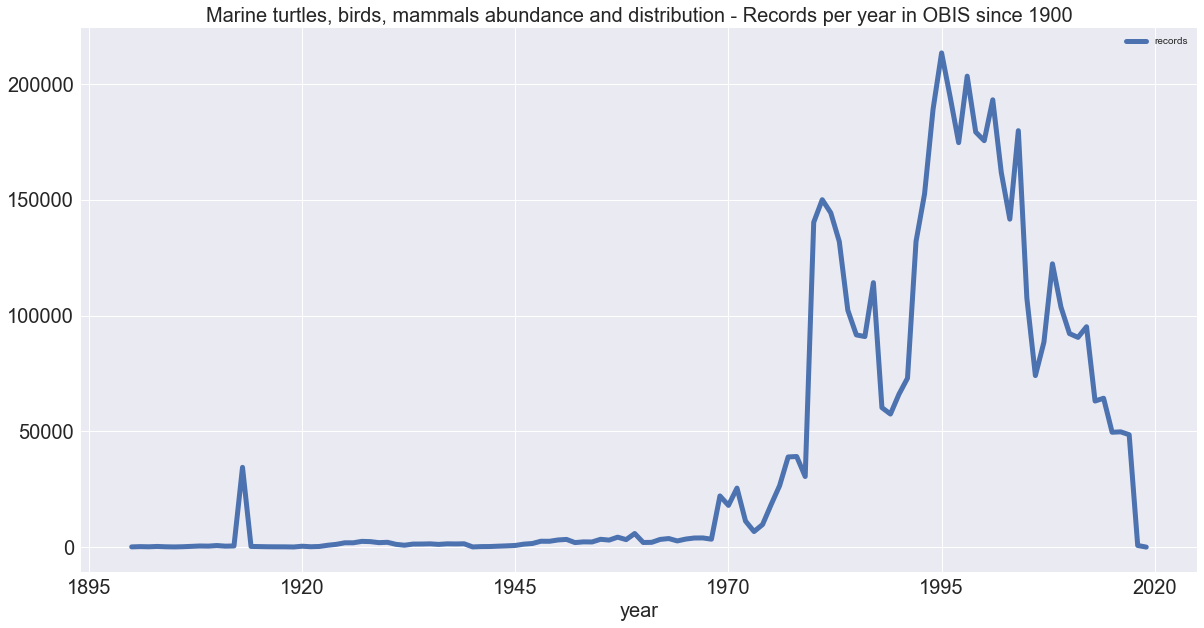

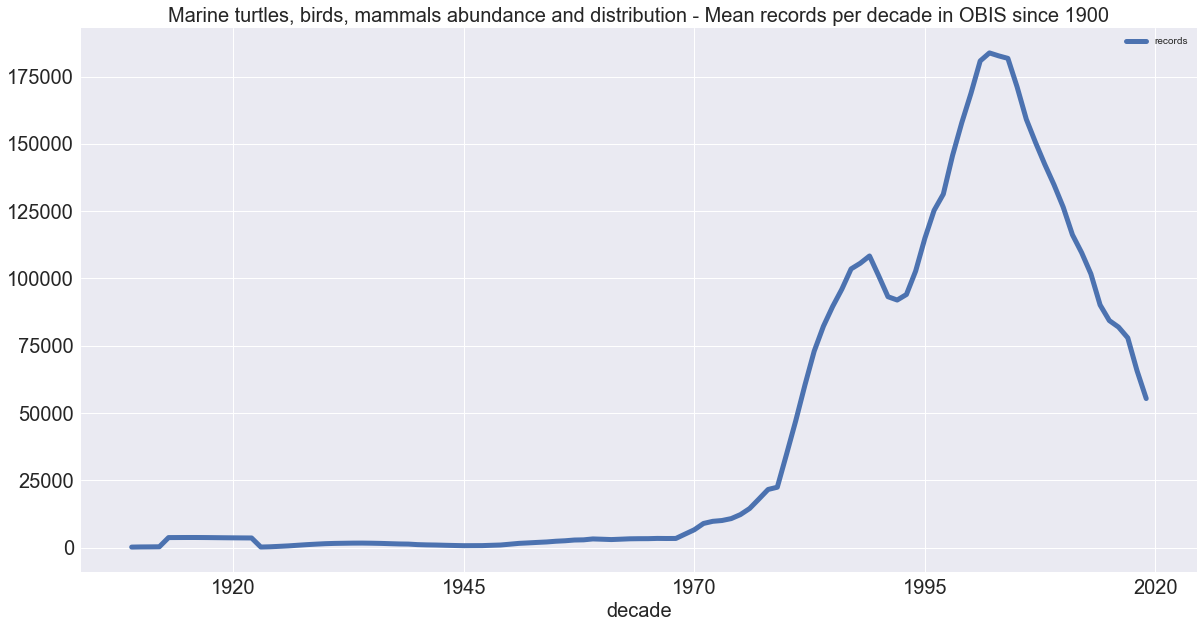

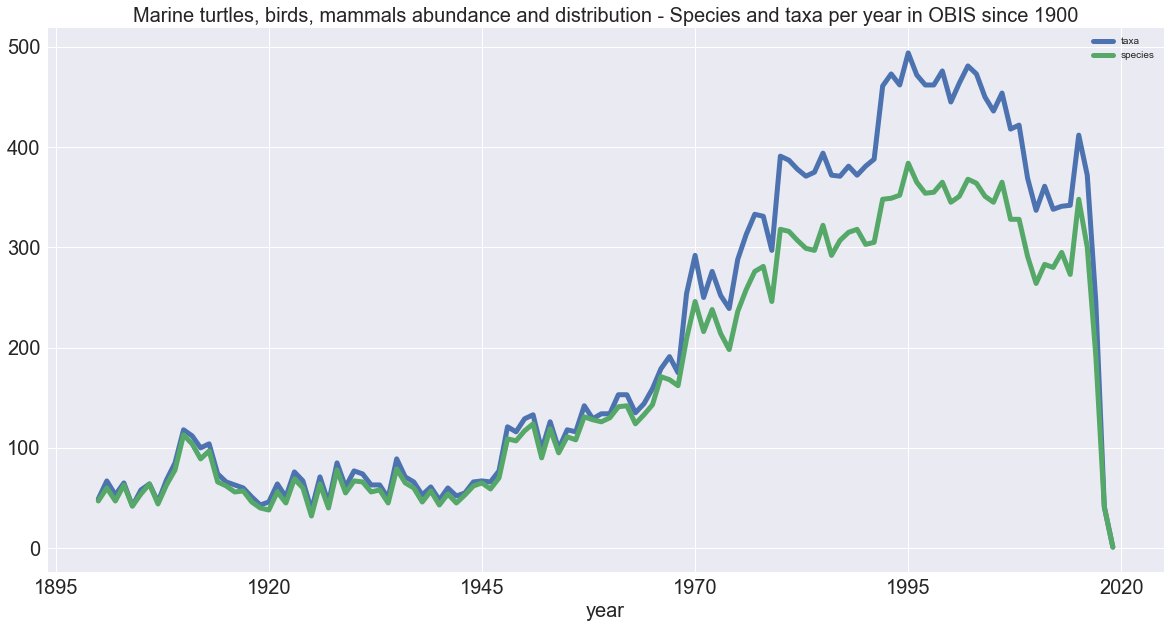

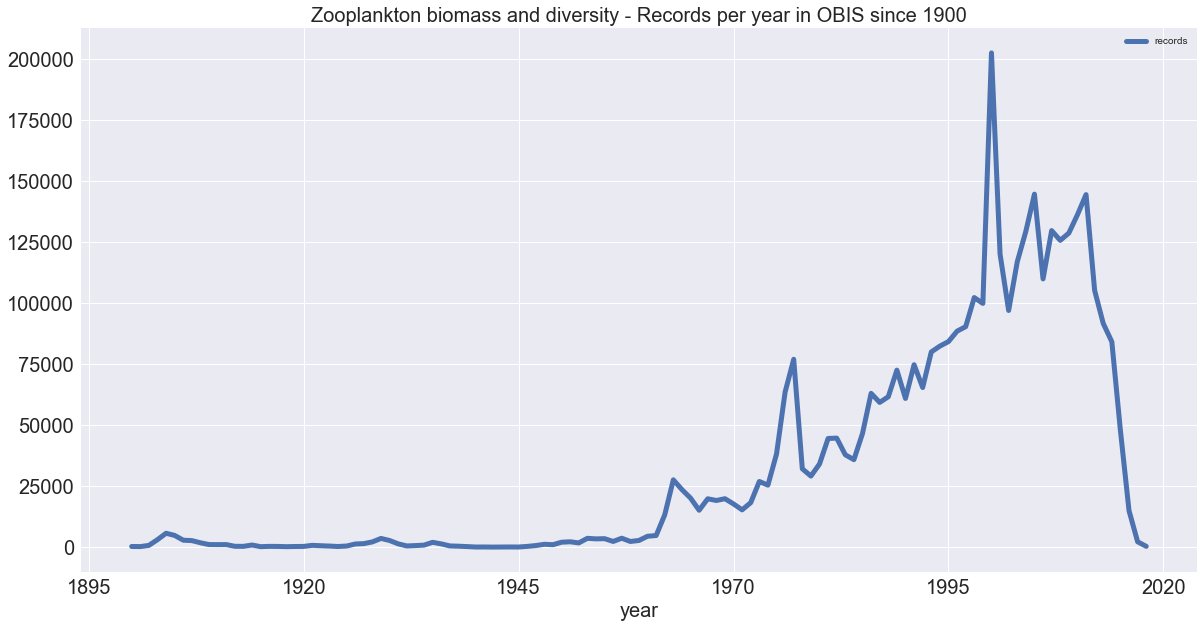

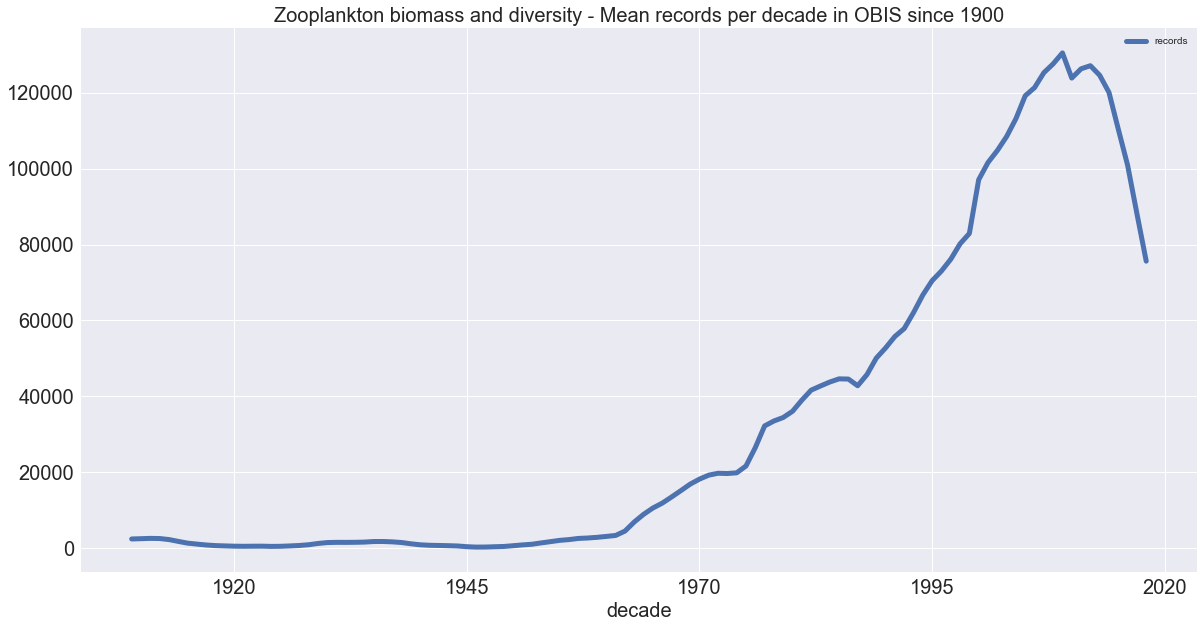

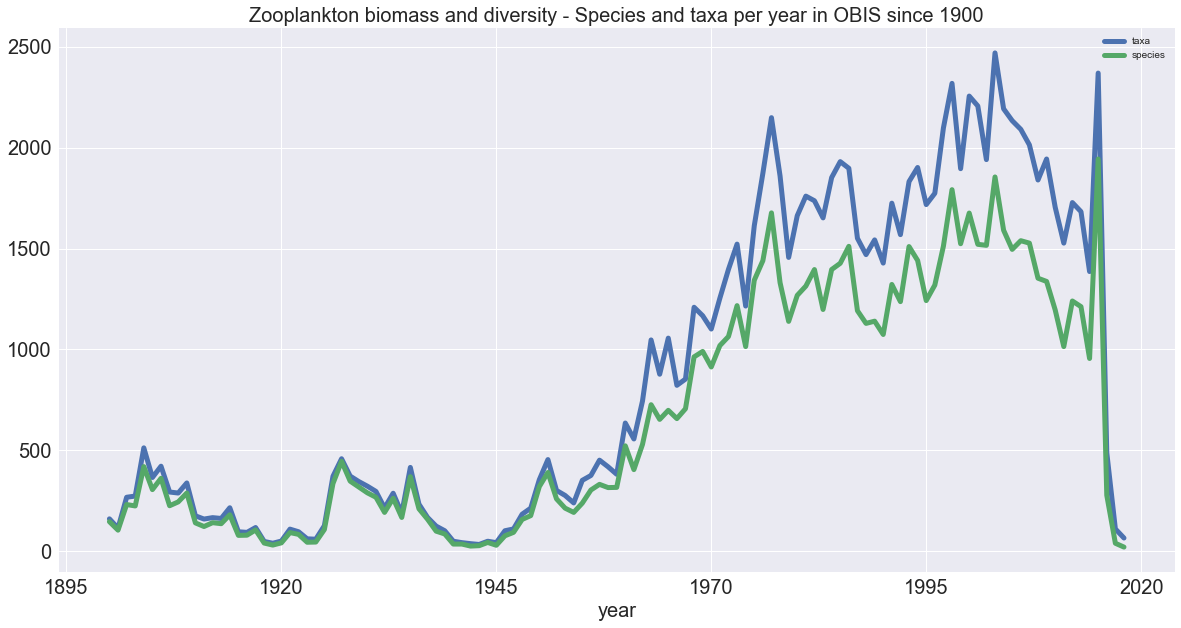

In [10]:
for eov,packet in eov_packet.items():
    try:
        obs_history = pf.summary_stats_by_aphiaids(pf.get_eov_packet(eov_name=eov, taxon_ids_only=True), summary_type="statistics/years")

        df = pd.DataFrame.from_dict(obs_history)
        df.year = pd.to_datetime(df.year, format='%Y')
        df.set_index('year', inplace=True)

        records = df[['records']]

        records.plot(figsize=(20,10), linewidth=5, fontsize=20)
        plt.xlabel('year', fontsize=20)
        plt.title(f"{packet['label']} - Records per year in OBIS since 1900", fontsize=20)

        records.rolling(10).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
        plt.xlabel('decade', fontsize=20)
        plt.title(f"{packet['label']} - Mean records per decade in OBIS since 1900", fontsize=20)

        df[['taxa','species']].plot(figsize=(20,10), linewidth=5, fontsize=20)
        plt.xlabel('year', fontsize=20)
        plt.title(f"{packet['label']} - Species and taxa per year in OBIS since 1900", fontsize=20)
    except Exception as e:
        print(e)
